C:\Users\ivaga\AppData\Local\Temp\ipykernel_15576\1353873990.py:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  datos_tabla = pd.read_html(str(tabla_html))[0]


Tabla con los datos filtrados:
        Fecha  % var.
0  17.05.2024  -1.79%
1  16.05.2024  +0.60%
2  15.05.2024  +4.39%
3  14.05.2024  -1.85%
4  13.05.2024  -4.41%


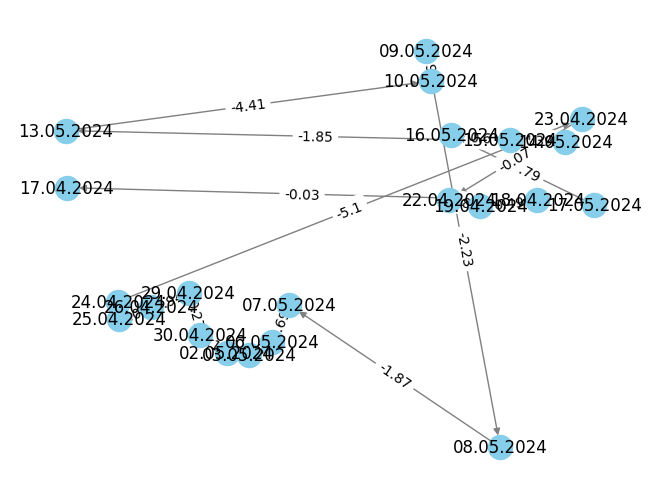

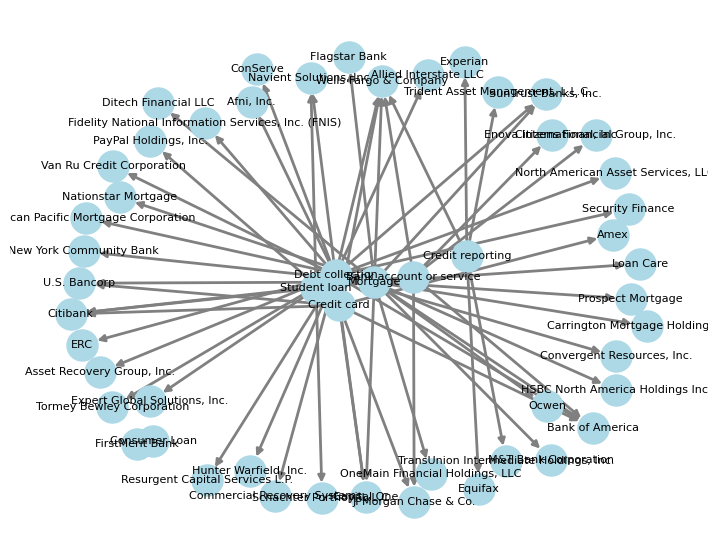

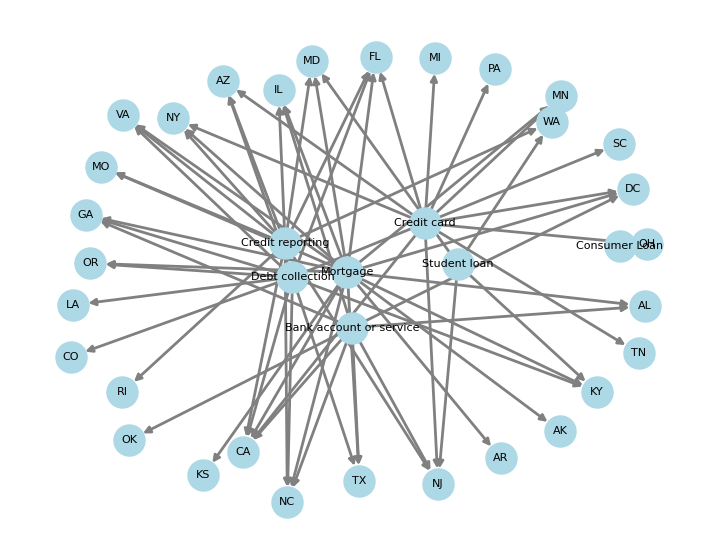

In [1]:
# Autor: Lisandro Ríos
# Trabajo Práctico Integrador de Matemática III - 1er cuatrimestre 2024
# Objetivo del trabajo: Este programa realiza varias tareas relacionadas con la obtención de datos de sitios web,
# análisis de datos y visualización de grafos utilizando las librerías BeautifulSoup, pandas, NetworkX y Matplotlib.

import requests
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt 
import re 

# Variables para el nombre de los archivos
archivo_csv = 'archivo.csv'
datos_filtrados_csv = 'mercados/datos_filtrados.csv'

# URL de la página web para hacer scraping
url = "https://es.investing.com/equities/bolsas-y-mercados-argentinos-sa-historical-data"

# Obtención del contenido de la página web
request = requests.get(url)
soup = BeautifulSoup(request.text)

# Extracción de datos de la tabla HTML
tabla_html = soup.find_all("table")[0]
datos_tabla = pd.read_html(str(tabla_html))[0]

# Exportar los datos de la tabla a un archivo CSV
datos_tabla.to_csv(archivo_csv, index=None, header=True)

# Filtrar datos seleccionando solo las columnas 'Fecha' y '% var.'
datos_filtrados = datos_tabla[['Fecha', '% var.']]

# Mostrar una vista previa de los datos filtrados
print("Tabla con los datos filtrados:")
print(datos_filtrados.head())

# Exportar los datos filtrados a otro archivo CSV
datos_filtrados.to_csv(datos_filtrados_csv, index=False)

# Leer los datos del archivo CSV
datos_csv = pd.read_csv(archivo_csv)

# Eliminar el símbolo '%' de la columna '% var.' y convertir a tipo float
datos_csv['% var.'] = datos_csv['% var.'].str.strip('%').astype(float)

# Crear un grafo dirigido con NetworkX
grafo = nx.DiGraph()  

# Agregar aristas al grafo con las fechas como nodos y el porcentaje de variación como peso de la arista
for i in range(len(datos_csv) - 1):
    grafo.add_edge(datos_csv.iloc[i]['Fecha'], datos_csv.iloc[i + 1]['Fecha'], weight=datos_csv.iloc[i]['% var.'])

# Calcular la disposición de los nodos en el grafo
pos = nx.spring_layout(grafo)  

# Dibujar el grafo con Matplotlib
nx.draw(grafo, pos, with_labels=True, node_color='skyblue', edge_color='gray')
labels = nx.get_edge_attributes(grafo, 'weight')
nx.draw_networkx_edge_labels(grafo, pos, edge_labels=labels)
plt.show()

# Leer otro archivo CSV llamado 'consumer_complaints.csv'
datos_complaints = pd.read_csv('consumer_complaints.csv')

# Eliminar varias columnas del DataFrame
datos_complaints = datos_complaints.drop(['date_received', 'sub_product','zipcode','tags', 'complaint_id','issue',
                                          'sub_issue', 'consumer_complaint_narrative', 'company_public_response',
                                          'consumer_consent_provided', 'date_sent_to_company', 
                                          'company_response_to_consumer', 'timely_response', 'consumer_disputed?',
                                          'company_response_to_consumer'], axis=1)

# Crear otro grafo dirigido con NetworkX
grafo_complaints = nx.DiGraph()

# Agregar aristas al grafo con los productos como origen y las compañías como destino
for i in range(len(datos_complaints)):
    grafo_complaints.add_edge(datos_complaints.iloc[i]['product'], datos_complaints.iloc[i]['company'])

# Dibujar el grafo con Matplotlib
fig, ax = plt.subplots(figsize=(9,7))
grafo_complaints.nodes(data=True)
nx.draw(grafo_complaints, node_color="lightblue", edge_color="gray", font_size=8, width=2, with_labels=True,
        node_size=500)
plt.show()

# Leer nuevamente el archivo CSV 'consumer_complaints.csv'
datos_complaints_b = pd.read_csv("consumer_complaints.csv")

# Crear otro grafo dirigido con NetworkX
grafo_complaints_b = nx.DiGraph()

# Agregar aristas al grafo con los productos como origen y los estados como destino
for i in range(len(datos_complaints_b)):
    grafo_complaints_b.add_edge(datos_complaints_b.iloc[i]['product'], datos_complaints_b.iloc[i]['state'])

# Dibujar el grafo con Matplotlib
fig, ax = plt.subplots(figsize=(9,7))
grafo_complaints_b.nodes(data=True)
nx.draw(grafo_complaints_b, node_color="lightblue", edge_color="gray", font_size=8, width=2, with_labels=True,
        node_size=500)
plt.show()
